In [6]:
import pandas as pd
df = pd.read_csv('boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df = pd.get_dummies(df, drop_first=True)

In [8]:
X = df.drop(columns=["medv"])
y = df["medv"]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

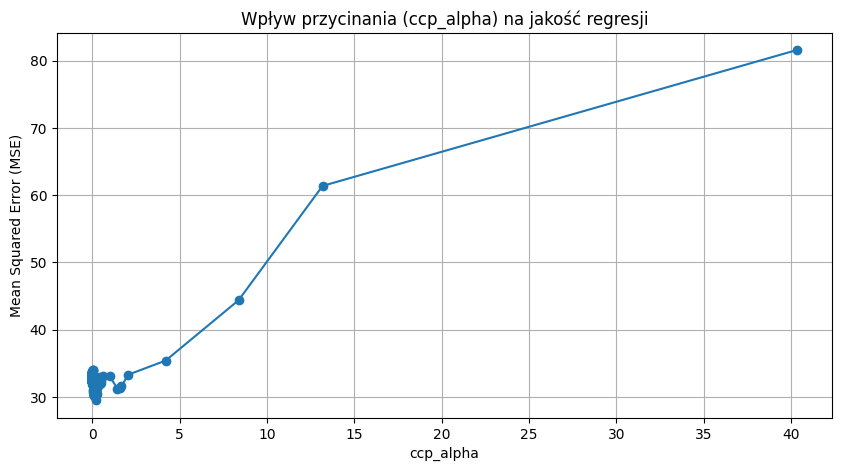

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Drzewo bez przycinania
reg_full = DecisionTreeRegressor(random_state=0)
reg_full.fit(X_train, y_train)
y_pred_full = reg_full.predict(X_test)
mse_full = mean_squared_error(y_test, y_pred_full)

# Ścieżka przycinania
path = reg_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Trening dla różnych wartości ccp_alpha
models = []
mse_values = []

for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
    reg.fit(X_train, y_train)
    mse = mean_squared_error(y_test, reg.predict(X_test))
    models.append(reg)
    mse_values.append(mse)

# Wykres MSE vs ccp_alpha
plt.figure(figsize=(10, 5))
plt.plot(ccp_alphas, mse_values, marker="o")
plt.xlabel("ccp_alpha")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Wpływ przycinania (ccp_alpha) na jakość regresji")
plt.grid()
plt.show()

# Najlepsze drzewo (najmniejsze MSE)
best_index = mse_values.index(min(mse_values))
best_alpha = ccp_alphas[best_index]
best_tree = models[best_index]


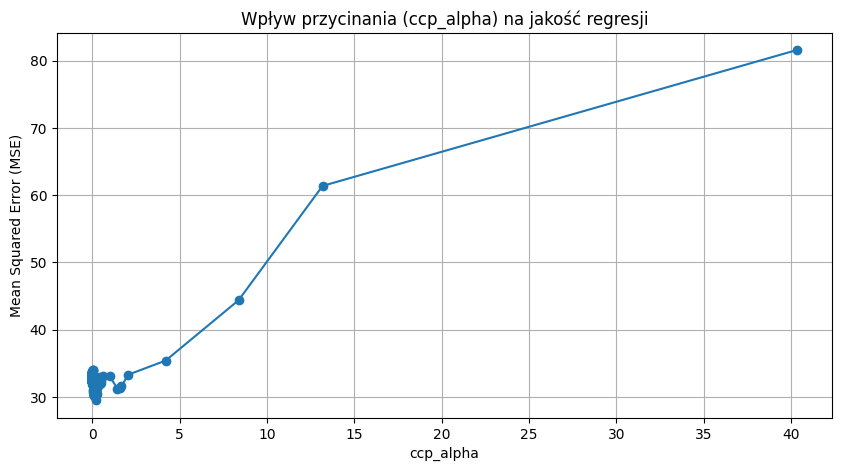

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Drzewo bez przycinania
reg_full = DecisionTreeRegressor(random_state=0)
reg_full.fit(X_train, y_train)
y_pred_full = reg_full.predict(X_test)
mse_full = mean_squared_error(y_test, y_pred_full)

# Ścieżka przycinania
path = reg_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Trening dla różnych wartości ccp_alpha
models = []
mse_values = []

for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
    reg.fit(X_train, y_train)
    mse = mean_squared_error(y_test, reg.predict(X_test))
    models.append(reg)
    mse_values.append(mse)

# Wykres MSE vs ccp_alpha
plt.figure(figsize=(10, 5))
plt.plot(ccp_alphas, mse_values, marker="o")
plt.xlabel("ccp_alpha")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Wpływ przycinania (ccp_alpha) na jakość regresji")
plt.grid()
plt.show()

# Najlepsze drzewo (najmniejsze MSE)
best_index = mse_values.index(min(mse_values))
best_alpha = ccp_alphas[best_index]
best_tree = models[best_index]


In [12]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)


In [13]:
print("MSE drzewa bez przycinania:", round(mse_full, 2))
print("MSE najlepszego drzewa z przycinaniem (ccp_alpha =", round(best_alpha, 4), "):", round(min(mse_values), 2))
print("MSE lasu losowego:", round(mse_rf, 2))

MSE drzewa bez przycinania: 32.42
MSE najlepszego drzewa z przycinaniem (ccp_alpha = 0.1954 ): 29.54
MSE lasu losowego: 18.44
